# Worksheet 06

Name:  
UID: 

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

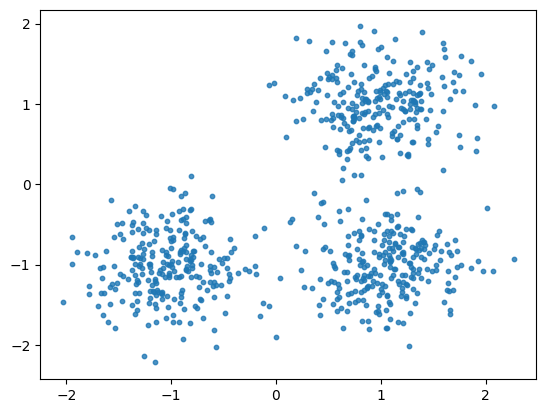

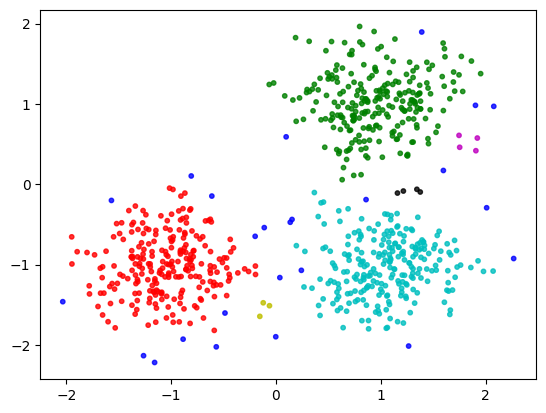

In [1]:
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon


    def eps_neighbour(self,p):
        neighbourhood=[]
        for pn in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[p]-self.dataset[pn])<=self.epsilon:
                 neighbourhood.append(pn)
        return neighbourhood

    def assign_core(self,p,assignment,label):
        assignment[p]=label
        neighbourhood=self.eps_neighbour(p)
        while neighbourhood:
            next_p=neighbourhood.pop()
            if assignment[next_p]==label:
                continue
            assignment[next_p]=label

            if len(self.eps_neighbour(next_p))>=self.min_pts:
                neighbourhood+=self.eps_neighbour(next_p)
        return assignment

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        label=1
        assignment=[0 for _ in range(len(self.dataset))]
        for p in range(len(assignment)):
            if assignment[p] !=0:
                continue
            if len(self.eps_neighbour(p))>=self.min_pts:
                assignment=self.assign_core(p,assignment,label)
                label+=1
        return assignment
        

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()